
# **Интерполяция параметрически заданной функции**

## Задание:
Рассмотрим задачу поиска интерполирующей кривой по точкам
$p_1, p_2, \dots, p_n$, $p_i = (x_i, y_i)$ ($i=1,\dots,n$).
Предположим, что форму этой кривой
нельзя описать функцией вида $y=f(x)$. Например, этого нельзя сделать
для кривой в форме буквы S и др. (функция была бы неоднозначной).

Нарисуйте букву S (или любую другую) и измерьте координаты $8$ точек $p_i$,
лежащих на ней. Интерполируйте эти данные думя способами:
 * кубическим интерполяетом;
 * кубическим сплайном.
 
Изобразите полученные кривые и сравните результаты.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

Добавим код для создания точек будущей буквы S и выведем график:

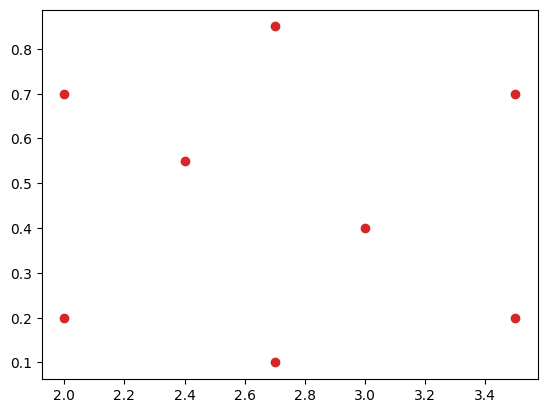

In [5]:
x = np.array([2, 2.7, 3.5, 3, 2.4, 2, 2.7, 3.5])
y = np.array([0.2, 0.1, 0.2, 0.4, 0.55, 0.7, 0.85, 0.7])
plt.plot(x, y, 'o', color='tab:red')
pass

## **`Способ №1**

Рассмотрим два набора данных $(i, x_i)$ и $(i, y_i)$ ($i=1,\dots,n$).
Их можно независимо интерполировать функциями $f(t)$, $g(t)$. Тогда кривая,
заданная параметрически,
$$
\left\{
\begin{array}{l}
x=f(t) \\
y=g(t)
\end{array}
\right.
$$
будет интерполировать наши данные.

Создадим массив i и подходящий нам linspace. Затем интерполируем наши данные кубическим интерполянтом:

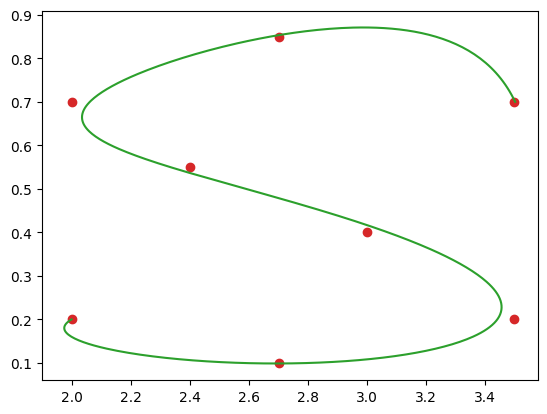

In [8]:
i = np.array([1, 2, 3, 4, 5, 6, 7, 8])
t = np.linspace(1, 8, 500)

f = np.polyfit(i, x, 6)
g = np.polyfit(i, y, 6)
xx = np.polyval(f,t)
yy = np.polyval(g,t)

plt.plot(xx, yy, color='tab:green')
plt.plot(x, y, 'o', color='tab:red')
pass

На графике появилась буква S, но не во всех местах линия проходит через нужные точки.

Теперь проведем интеполяцию кубическим сплайном:

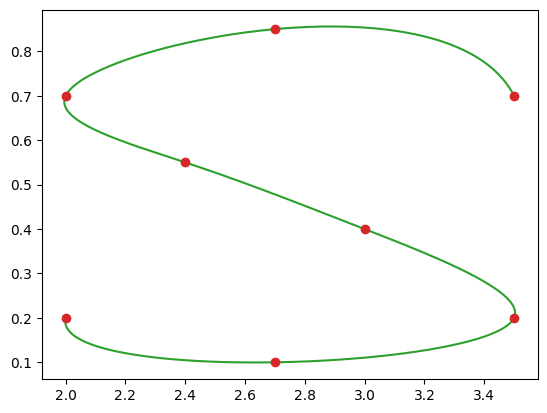

In [9]:
f = interpolate.interp1d(i, x, kind = 3)
g = interpolate.interp1d(i, y, kind = 3)
xx = f(t)
yy = g(t)
plt.plot(xx, yy, color='tab:green')
plt.plot(x, y, 'o', color='tab:red')
pass

После этого у нас получилась более акккуратная буква S, совпадающая с нашими точками.

## **`Способ №2**

Другой способ – интерполировать точки $\left(\sum\limits_{j=1}^{i-1} d_j, ~x_i\right)$
и $\left(\sum\limits_{j=1}^{i-1} d_j, ~y_i\right)$ ($i=1,\dots,n$), где $d_i$ – расстояние между точками
$p_i$ и $p_{i+1}$.